### Final Project: Foundations of Machine Learning SoSe 2025
#### "Building a Multilayer Perceptron to classify traffic signs"
Dataset: The German Traffic Sign Recognition Benchmark

Belana Floßbach, Melina Immke, Jeremy Uzoagba


In [1]:
# import libraries

import os
import cv2

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


### Import Images:

In [2]:
#import pictures

current_working_directory = str(os.getcwd())
print(current_working_directory)

# for this we used the readTrafficSigns utility function that was shipped with the dataset
# It is in a .py File called readTrafficSigns that lies in the same folder as this notebook

# from readTrafficSigns import readTrafficSigns
from readTrafficSigns1 import readTrafficSigns # the readTrafficSigns1 file is modified such that we only read in the first 5 classes (for computation-power related reasons)

# add file path to data on your machine here:
trainImages, trainLabels = readTrafficSigns(current_working_directory + "/Images") 
# trainImages, trainLabels = readTrafficSigns(r"C:\Users\PC\Foundations of Machine Learning\FinalTesting\data\GTSRB\Final_Training\Images") # hier muss jeder immer seinen Lokalen Pfad angeben, das ggf mit syspath oder so cleaner machen


c:\Users\belan\Documents\Uni\4. Semester\Foundations of ML\Final Assignment GitHub Jeremy\ML_Final_Project


1


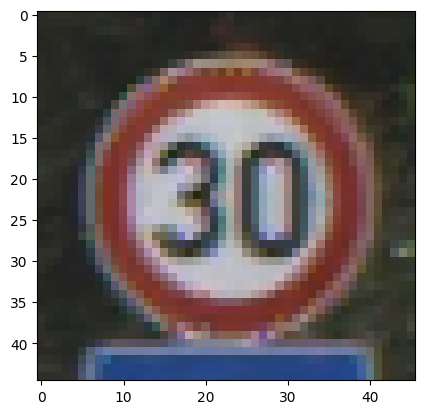

In [3]:
#TESTCELL to check if import worked, remove for final version?



plt.imshow(trainImages[500])

print(trainLabels[500])

### Preprocessing:

In [4]:
# find the size of the biggest picture 


max_pixel_x = 0
max_pixel_y = 0


for i in range(len(trainImages)):
    pixel_x = trainImages[i].shape[0]
    pixel_y = trainImages[i].shape[1]

    if pixel_x > max_pixel_x:
        max_pixel_x = pixel_x
        index = i 
    if pixel_y > max_pixel_y:
        max_pixel_y = pixel_y

print(max_pixel_x, max_pixel_y)

171 171


(171, 171, 3)


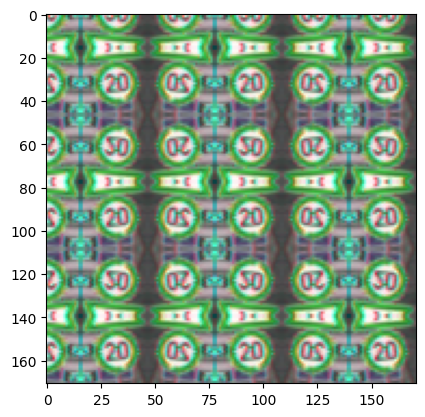

In [5]:
# mirrored version:



#makes all images the same pixel size
resized_images_mirrored = []

#go through all images and resize them to 225 x 243 pixels by making reflecting borders
for i in range(len(trainImages)):
    img = trainImages[i]
    pixel_x = trainImages[i].shape[0] #gets pixel size of image
    pixel_y = trainImages[i].shape[1]
    border_x = max_pixel_x - pixel_x  #calculates border size
    border_y = max_pixel_y - pixel_y
    #actually adding the border to the image
    img = cv2.copyMakeBorder(img,border_x,0, border_y,0,cv2.BORDER_REFLECT) 
    #save new image with borders
    resized_images_mirrored.append(img)

plt.imshow(resized_images_mirrored[5])
print(resized_images_mirrored[3].shape)

Dimensions of the normlized image:(171, 171)
 Example of normalized values:[[0.64705882 0.51372549 0.71764706 ... 0.34901961 0.36862745 0.37254902]
 [0.57647059 0.60392157 0.83921569 ... 0.32941176 0.36470588 0.34901961]
 [0.50588235 0.55686275 0.6        ... 0.31372549 0.32941176 0.3254902 ]
 ...
 [0.47843137 0.42352941 0.4        ... 0.2745098  0.28627451 0.29019608]
 [0.41176471 0.34117647 0.32941176 ... 0.26666667 0.28235294 0.33333333]
 [0.37647059 0.34509804 0.3372549  ... 0.27843137 0.29019608 0.34509804]]


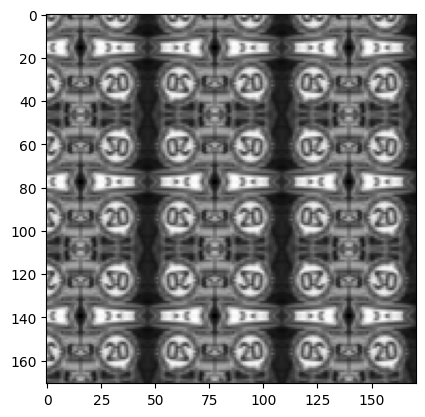

In [6]:
#conversion to grey scale and normalization for mirrored images

normalized_images_mirrored = []
grey_scale_images_mirrored = []

for i in range(len(resized_images_mirrored)):

    #conversion to greyscale reduces dimensiomns from 3 to 2
    grey_scale_images_mirrored.append(cv2.cvtColor(resized_images_mirrored[i], cv2.COLOR_RGB2GRAY))  # Convert to grayscale
    normalized_images_mirrored.append(grey_scale_images_mirrored[i] / 255.0)  # Normalize pixel values to [0, 1]

#plot gray scale image and show normalized values of image
plt.imshow(grey_scale_images_mirrored[5], cmap='gray')
print(f"Dimensions of the normlized image:{normalized_images_mirrored[3].shape}\n",f"Example of normalized values:{normalized_images_mirrored[3]}")


(171, 171, 3)


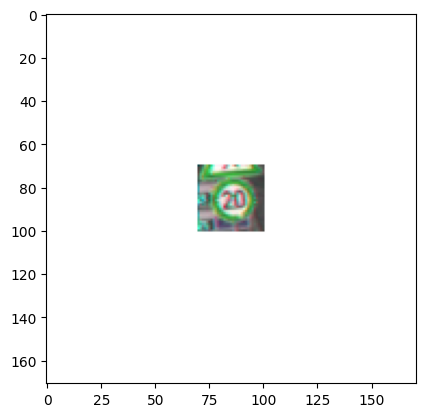

In [7]:
#padded version:

#makes all images the same pixel size
resized_images_padded = []


#go through all images and resize them to 225 x 243 pixels by making reflecting borders
for i in range(len(trainImages)):
    img = trainImages[i]
    pixel_x = trainImages[i].shape[0] #gets pixel size of image
    pixel_y = trainImages[i].shape[1]
    border_x = max_pixel_x - pixel_x  #calculates border size
    border_y = max_pixel_y - pixel_y

    # alligns padding so that picture is displayed in the middle
    top = border_x // 2
    bottom = border_x - top
    left = border_y // 2
    right = border_y - left

    #actually adding the border to the image
    img = cv2.copyMakeBorder(img,top,bottom, left,right,cv2.BORDER_CONSTANT, value=[255, 255, 255]) 
    #save new image with borders
    resized_images_padded.append(img)

plt.imshow(resized_images_padded[5])
print(resized_images_padded[7].shape)

Dimensions of the normlized image:(171, 171)
 Example of normalized values:[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


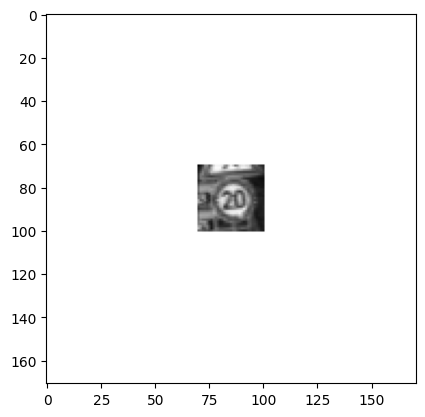

In [8]:
#conversion to grey scale and normalization for padded images

normalized_images_padded = []
grey_scale_images_padded = []

for i in range(len(resized_images_padded)):

    #conversion to greyscale reduces dimensiomns from 3 to 2
    grey_scale_images_padded.append(cv2.cvtColor(resized_images_padded[i], cv2.COLOR_RGB2GRAY))  # Convert to grayscale
    normalized_images_padded.append(grey_scale_images_padded[i] / 255.0)  # Normalize pixel values to [0, 1]

#plot gray scale image and show normalized values of image
plt.imshow(grey_scale_images_padded[5], cmap='gray')
print(f"Dimensions of the normlized image:{normalized_images_padded[3].shape}\n",f"Example of normalized values:{normalized_images_padded[3]}")


In [9]:
# loading labels

trainLabels_array = np.array(trainLabels,dtype=int, ndmin=2)
print(trainLabels_array, trainLabels_array.shape)

#one hot encoding labels
num_classes = trainLabels_array.max() + 1  
trainLabels_one_hot= np.zeros((trainLabels_array.size, num_classes))

trainLabels_one_hot[np.arange(trainLabels_array.size), trainLabels_array] = 1 # this is the one hot encoded array


print(trainLabels_one_hot.shape, trainLabels_one_hot, type(trainLabels_one_hot))

[[0 0 0 ... 4 4 4]] (1, 8070)
(8070, 5) [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]] <class 'numpy.ndarray'>


### Split into Training, Validation and Test Sets:

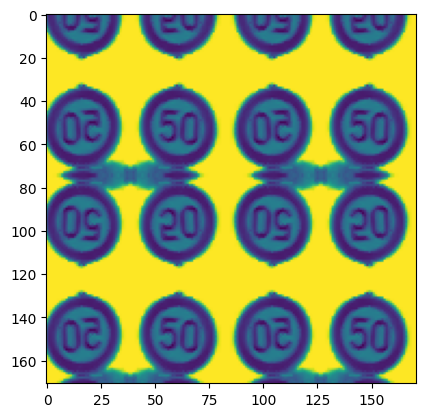

In [10]:
# Split into Test, Validation and Training Sets
# for mirrored images

X_train_mirrored, X_test_mirrored, y_train_mirrored, y_test_mirrored = train_test_split(normalized_images_mirrored, trainLabels_one_hot , random_state=1,test_size=0.20, shuffle=True)
X_train_mirrored, X_val_mirrored, y_train_mirrored, y_val_mirrored = train_test_split(X_train_mirrored, y_train_mirrored, random_state=1, test_size=0.20, shuffle=True)

plt.imshow(X_train_mirrored[500])

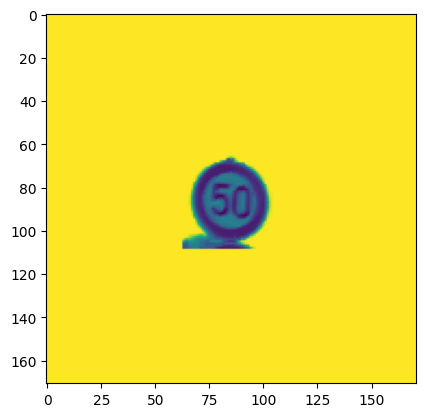

In [11]:
# Split into Test, Validation and Training Sets
# for padded images

X_train_padded, X_test_padded, y_train_padded, y_test_padded = train_test_split(normalized_images_padded, trainLabels_one_hot , random_state=1,test_size=0.20, shuffle=True)
X_train_padded, X_val_padded, y_train_padded, y_val_padded = train_test_split(X_train_padded, y_train_padded, random_state=1, test_size=0.20, shuffle=True)

plt.imshow(X_train_padded[500])

### Prepare Input data for MLP:

In [12]:
# make the input data from lists to np.arrays and flatten it
# for mirrored images

X_train_mirrored = np.array([img.flatten() for img in X_train_mirrored], dtype=np.float32)
X_test_mirrored = np.array([img.flatten() for img in X_test_mirrored], dtype=np.float32)
X_val_mirrored = np.array([img.flatten() for img in X_val_mirrored], dtype=np.float32)

print(X_val_mirrored[1])

[0.1764706  0.16470589 0.16470589 ... 0.10196079 0.10196079 0.09411765]


In [13]:
# make the input data from lists to np.arrays and flatten it
# for padded images

X_train_padded = np.array([img.flatten() for img in X_train_padded], dtype=np.float32)
X_test_padded = np.array([img.flatten() for img in X_test_padded], dtype=np.float32)
X_val_padded = np.array([img.flatten() for img in X_val_padded], dtype=np.float32)

print(X_val_padded[1])

[1. 1. 1. ... 1. 1. 1.]


### Baseline Model (MPL)

In [14]:
#Baseline Neural Network (Multilayer Perceptron)

class MLP:

    """Baseline Multi layer Perceptron with 1 layer to be used for image classification
    Input: (greyscaled) image as flattened array
    Output: vector of class probabilities (given by softmax?)"""
    def __init__(self, input_length, length_hidden_layer, length_output_layer):
        
        # initialize weights for hidden layer and output layer
        # layers = weight matrixes with dimensions: previous layer x next layer
        self.weights_input_hidden = np.random.randn(input_length, length_hidden_layer)
        self.weights_hidden_output = np.random.randn(length_hidden_layer, length_output_layer) 

        # add biases for hidden layer and output layer
        self.bias_hidden = np.zeros((1,length_hidden_layer))
        self.bias_output = np.zeros((1,length_output_layer))
        
    # softmax function to normalize so that all values of output layer add up to 1
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    # use ReLu as our activation function
    def ReLu(self, x): # input is matrix
        return x * (x > 0) # matrix mult. between x and 0|1 / True|False matrix -> 0 if > 0, else just the number
   
    # forward pass of our MLP, taking data (=X) as input
    def forward_pass(self, X):
        
        # hidden layer calculations
        self.input_hidden_layer = np.matmul(X, self.weights_input_hidden) + self.bias_hidden
        self.output_hidden_layer = self.ReLu(self.input_hidden_layer)

        # output layer calculations
        self.output_layer = np.dot(self.output_hidden_layer, self.weights_hidden_output) + self.bias_output
        self.final_output = self.softmax(self.output_layer)
       
        # returns final output of output layer
        return self.final_output
    
    # backward pass, takes data(=X), target values(=y), output of the forward pass and learning rate
    def backward_pass(self, X, y, output, learning_rate):

        m = X.shape[0]  #get shape of data to normalize gradients later on

        # calculate output error and error of hidden layer
        output_error = output - y 

        relu_derivative = (self.input_hidden_layer > 0).astype(float) 
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * relu_derivative 
    
        # calculate gradients
        dW_hidden_output = np.dot(self.output_hidden_layer.T, output_error) / m     # for updating output weights 
        db_output = np.sum(output_error, axis=0, keepdims=True) / m                 # for updating output bias
        dW_input_hidden = np.dot(X.T, hidden_error) / m                             # for updating hidden layer weights
        db_hidden = np.sum(hidden_error, axis=0, keepdims=True) / m                 # for updating hidden layer bias
        
        # Update weights and biases with the gradients calculated above
        self.weights_hidden_output -= learning_rate * dW_hidden_output
        self.bias_output -= learning_rate * db_output

        self.weights_input_hidden -= learning_rate * dW_input_hidden
        self.bias_hidden -= learning_rate * db_hidden
    
    # train function that takes data(=X), target labels(=y), epochs and learning rate as input
    def train(self, X, y, epochs, learning_rate):

        # go through all numbers of epoch, doing a forward and backward pass and calculating the loss
        for epoch in range(epochs):

            output = self.forward_pass(X)
            self.backward_pass(X, y, output, learning_rate)
            #if (epoch + 1) % 10 == 0 or epoch == 0:
            loss = -np.sum(y * np.log(output + 1e-15)) /(len(y))
            print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')

    # predict function for our testing data
    def predict(self, X):
        output = self.forward_pass(X)
        return np.argmax(output, axis=1)



In [18]:
# Training the network with our baseline MLP on the mirrored data 

network = MLP(len(X_train_mirrored[1]),10, 5)

train = network.train(X_train_mirrored, y_train_mirrored, 50, 0.05)

Epoch 1, Loss: 30.0707
Epoch 2, Loss: 13.5240
Epoch 3, Loss: 4.4205
Epoch 4, Loss: 3.4275
Epoch 5, Loss: 2.9982
Epoch 6, Loss: 2.7454
Epoch 7, Loss: 2.5769
Epoch 8, Loss: 2.4452
Epoch 9, Loss: 2.3419
Epoch 10, Loss: 2.2637
Epoch 11, Loss: 2.2001
Epoch 12, Loss: 2.1462
Epoch 13, Loss: 2.1037
Epoch 14, Loss: 2.0694
Epoch 15, Loss: 2.0408
Epoch 16, Loss: 2.0141
Epoch 17, Loss: 1.9890
Epoch 18, Loss: 1.9663
Epoch 19, Loss: 1.9464
Epoch 20, Loss: 1.9282
Epoch 21, Loss: 1.9117
Epoch 22, Loss: 1.8951
Epoch 23, Loss: 1.8796
Epoch 24, Loss: 1.8660
Epoch 25, Loss: 1.8548
Epoch 26, Loss: 1.8440
Epoch 27, Loss: 1.8330
Epoch 28, Loss: 1.8218
Epoch 29, Loss: 1.8106
Epoch 30, Loss: 1.7999
Epoch 31, Loss: 1.7905
Epoch 32, Loss: 1.7817
Epoch 33, Loss: 1.7734
Epoch 34, Loss: 1.7656
Epoch 35, Loss: 1.7582
Epoch 36, Loss: 1.7511
Epoch 37, Loss: 1.7439
Epoch 38, Loss: 1.7366
Epoch 39, Loss: 1.7294
Epoch 40, Loss: 1.7227
Epoch 41, Loss: 1.7166
Epoch 42, Loss: 1.7108
Epoch 43, Loss: 1.7055
Epoch 44, Loss: 1.

In [19]:
# Training the network with our baselina MLP on the padded data 

network = MLP(len(X_train_padded[1]),10, 5) 

train = network.train(X_train_padded, y_train_padded, 50, 0.05)

Epoch 1, Loss: 25.2286
Epoch 2, Loss: 3.1588
Epoch 3, Loss: 1.6101
Epoch 4, Loss: 1.6079
Epoch 5, Loss: 1.6058
Epoch 6, Loss: 1.6037
Epoch 7, Loss: 1.6017
Epoch 8, Loss: 1.5996
Epoch 9, Loss: 1.5977
Epoch 10, Loss: 1.5957
Epoch 11, Loss: 1.5938
Epoch 12, Loss: 1.5920
Epoch 13, Loss: 1.5901
Epoch 14, Loss: 1.5884
Epoch 15, Loss: 1.5866
Epoch 16, Loss: 1.5849
Epoch 17, Loss: 1.5832
Epoch 18, Loss: 1.5815
Epoch 19, Loss: 1.5799
Epoch 20, Loss: 1.5783
Epoch 21, Loss: 1.5767
Epoch 22, Loss: 1.5752
Epoch 23, Loss: 1.5736
Epoch 24, Loss: 1.5721
Epoch 25, Loss: 1.5707
Epoch 26, Loss: 1.5692
Epoch 27, Loss: 1.5678
Epoch 28, Loss: 1.5664
Epoch 29, Loss: 1.5651
Epoch 30, Loss: 1.5637
Epoch 31, Loss: 1.5624
Epoch 32, Loss: 1.5611
Epoch 33, Loss: 1.5599
Epoch 34, Loss: 1.5586
Epoch 35, Loss: 1.5574
Epoch 36, Loss: 1.5562
Epoch 37, Loss: 1.5550
Epoch 38, Loss: 1.5538
Epoch 39, Loss: 1.5527
Epoch 40, Loss: 1.5516
Epoch 41, Loss: 1.5504
Epoch 42, Loss: 1.5494
Epoch 43, Loss: 1.5483
Epoch 44, Loss: 1.5

-> mirrored version hat minimal kleineren Loss, als nächstes muss man untersuchen ob es auch auf dem Testset besser performt, könnte z.B. sein, dass es mehr nur mehr data zum darauf trainieren hat (durch das spiegeln erzeugte visual noise), aber das nicht hilft beim predicten von Verkehrszeichen ohne diese noise
-> bzw. es kommt drauf an, normalized man das Testset genauso wie das training set? dann kommt es ja aufs selbe raus weil die bilder trotzdem mit mirroring/padding preprocessed werden -> richtiges vorgehen rausfinden, evtl doch das test set nehmen?

=> bin gespannt was hier rauskommt hehe

In [ ]:
# Hyperparameter search  
#TODO


In [ ]:
# evaluation of performance
#TODO

# -> Accuracy, Recall, F1 etc
# -> confusion matrix?
# -> loss kurven
# -> ablation study?

### Incremental improvement

In [20]:
# MLP with 2 hidden layers

class MLP2layers:
    
    """Multi layer Perceptron  with 2 layers to be used for image classification
    Input: (greyscaled) image as flattened 2D array
    Output: vector of class probabilities (given by softmax?)"""

    def __init__(self, input_length, length_hidden_layer, length_output_layer):
        
        # initialize weights for hidden layers and output layer
        # layers = weight matrixes with dimensions: previous layer x next layer
        self.weights_input_hidden_1 = np.random.randn(input_length, length_hidden_layer)
        self.weights_input_hidden_2 = np.random.randn(length_hidden_layer, length_hidden_layer) 

        self.weights_hidden_output = np.random.randn(length_hidden_layer, length_output_layer) 

        # add biases for hidden layers and output layer
        self.bias_hidden_1 = np.zeros((1,length_hidden_layer))
        self.bias_hidden_2 = np.zeros((1,length_hidden_layer))
        self.bias_output = np.zeros((1,length_output_layer))

    # softmax function to normalize so that all values of output layer add up to 1
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    # ReLu as our activation function
    def ReLu(self, x): # input is matrix
        return x * (x > 0) # matrix mult. between x and 0|1 / True|False matrix -> 0 if > 0, else just the number
   
   # forward pass of our MLP
    def forward_pass(self, X):
        
        # hidden layer calculations
        self.input_hidden_layer_1 = np.matmul(X, self.weights_input_hidden_1) + self.bias_hidden_1
        self.output_hidden_layer_1 = self.ReLu(self.input_hidden_layer_1)

        self.input_hidden_layer_2 = np.matmul(self.output_hidden_layer_1, self.weights_input_hidden_2) + self.bias_hidden_2
        self.output_hidden_layer_2 = self.ReLu(self.input_hidden_layer_2)

        # output layer calculations
        self.output_layer = np.dot(self.output_hidden_layer_2, self.weights_hidden_output) + self.bias_output
        self.final_output = self.softmax(self.output_layer)
        
        #returns final output of output layer
        return self.final_output
    
    # backward pass, takes data(=X), target values(=y), output of the forward pass and learning rate
    def backward_pass(self, X, y, output,learning_rate):

        m = X.shape[0] #get shape of data to normalize gradients later on

        # calculate output error and error of hidden layers
        output_error = output -y

        relu_derivative_1 = (self.input_hidden_layer_2 > 0).astype(float)
        hidden_error_2 = np.dot(output_error, self.weights_hidden_output.T) * relu_derivative_1

        relu_derivative_2 = (self.input_hidden_layer_1 > 0).astype(float)
        hidden_error_1 = np.dot(hidden_error_2, self.weights_input_hidden_2.T) * relu_derivative_2

        # calculate gradients 
        dW_hidden_output_2 = np.dot(self.output_hidden_layer_2.T, output_error) / m     # for updating output weights
        db_output = np.sum(output_error, axis=0, keepdims=True) / m                     # for udating output bias
        dW_input_hidden_2 = np.dot(self.output_hidden_layer_1.T, hidden_error_2) / m    # for updating weights of hidden input layer 2
        db_hidden_2 = np.sum(hidden_error_2, axis=0, keepdims=True) / m                 # for updating bias of hidden layer 2

        dW_input_hidden_1 = np.dot(X.T, hidden_error_1) / m                             # for updating weights of hidden layer 1
        db_hidden_1 = np.sum(hidden_error_1, axis=0, keepdims=True) / m                 # for updating bias of hidden layer 1
        
        # update weights and biases with gradients calculated above
        self.weights_input_hidden_1 -= learning_rate * dW_input_hidden_1
        self.bias_hidden_1 -= learning_rate * db_hidden_1

        self.weights_input_hidden_2 -= learning_rate * dW_input_hidden_2
        self.weights_hidden_output -= learning_rate * dW_hidden_output_2
        self.bias_hidden_2 -= learning_rate * db_hidden_2
        
        self.bias_output -= learning_rate * db_output

    # train function that takes data(=X), target labels(=y), epochs and learning rate as input
    def train(self, X, y, epochs, learning_rate):

        # go through all numbers of epoch, doing a forward and backward pass and calculating the loss
        for epoch in range(epochs):

            output = self.forward_pass(X)
            self.backward_pass(X, y, output, learning_rate)
            #if (epoch + 1) % 10 == 0 or epoch == 0: 
            loss = -np.sum(y * np.log(output + 1e-15)) /(len(y))
            print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')

    # predict function for our testing data
    def predict(self, X):
        output = self.forward_pass(X)
        return np.argmax(output, axis=1)


In [21]:
# Train the network with a 2 layer MLP on mirrored data

network = MLP2layers(len(X_train_mirrored[1]),10,5) 

train = network.train(X_train_mirrored, y_train_mirrored, 50, 0.05)

Epoch 1, Loss: 20.9792
Epoch 2, Loss: 20.6072
Epoch 3, Loss: 20.1768
Epoch 4, Loss: 5.7663
Epoch 5, Loss: 2.3917
Epoch 6, Loss: 2.1886
Epoch 7, Loss: 2.0692
Epoch 8, Loss: 1.9975
Epoch 9, Loss: 1.9439
Epoch 10, Loss: 1.9020
Epoch 11, Loss: 1.8690
Epoch 12, Loss: 1.8421
Epoch 13, Loss: 1.8180
Epoch 14, Loss: 1.7973
Epoch 15, Loss: 1.7798
Epoch 16, Loss: 1.7635
Epoch 17, Loss: 1.7478
Epoch 18, Loss: 1.7327
Epoch 19, Loss: 1.7191
Epoch 20, Loss: 1.7079
Epoch 21, Loss: 1.6982
Epoch 22, Loss: 1.6895
Epoch 23, Loss: 1.6814
Epoch 24, Loss: 1.6735
Epoch 25, Loss: 1.6659
Epoch 26, Loss: 1.6582
Epoch 27, Loss: 1.6506
Epoch 28, Loss: 1.6434
Epoch 29, Loss: 1.6366
Epoch 30, Loss: 1.6304
Epoch 31, Loss: 1.6248
Epoch 32, Loss: 1.6197
Epoch 33, Loss: 1.6149
Epoch 34, Loss: 1.6104
Epoch 35, Loss: 1.6061
Epoch 36, Loss: 1.6020
Epoch 37, Loss: 1.5980
Epoch 38, Loss: 1.5942
Epoch 39, Loss: 1.5906
Epoch 40, Loss: 1.5873
Epoch 41, Loss: 1.5838
Epoch 42, Loss: 1.5803
Epoch 43, Loss: 1.5769
Epoch 44, Loss: 1

In [22]:
# Training the network with a 2 layer MLP on the padded data 

network = MLP2layers(len(X_train_padded[1]),10,5) 

train = network.train(X_train_padded, y_train_padded, 50, 0.05)

Epoch 1, Loss: 24.9970
Epoch 2, Loss: 28.3855
Epoch 3, Loss: 1.6477
Epoch 4, Loss: 1.6046
Epoch 5, Loss: 1.6019
Epoch 6, Loss: 1.5993
Epoch 7, Loss: 1.5968
Epoch 8, Loss: 1.5944
Epoch 9, Loss: 1.5920
Epoch 10, Loss: 1.5897
Epoch 11, Loss: 1.5875
Epoch 12, Loss: 1.5854
Epoch 13, Loss: 1.5833
Epoch 14, Loss: 1.5813
Epoch 15, Loss: 1.5794
Epoch 16, Loss: 1.5775
Epoch 17, Loss: 1.5756
Epoch 18, Loss: 1.5738
Epoch 19, Loss: 1.5721
Epoch 20, Loss: 1.5703
Epoch 21, Loss: 1.5687
Epoch 22, Loss: 1.5671
Epoch 23, Loss: 1.5655
Epoch 24, Loss: 1.5639
Epoch 25, Loss: 1.5624
Epoch 26, Loss: 1.5610
Epoch 27, Loss: 1.5595
Epoch 28, Loss: 1.5581
Epoch 29, Loss: 1.5567
Epoch 30, Loss: 1.5554
Epoch 31, Loss: 1.5541
Epoch 32, Loss: 1.5528
Epoch 33, Loss: 1.5515
Epoch 34, Loss: 1.5503
Epoch 35, Loss: 1.5491
Epoch 36, Loss: 1.5479
Epoch 37, Loss: 1.5468
Epoch 38, Loss: 1.5456
Epoch 39, Loss: 1.5445
Epoch 40, Loss: 1.5434
Epoch 41, Loss: 1.5423
Epoch 42, Loss: 1.5413
Epoch 43, Loss: 1.5403
Epoch 44, Loss: 1.

In [23]:
#MLP with 5 hidden layers

class MLP5layers:    
    """Multi layer Perceptron with 5 layeers to be used for image classification
    Input: (greyscaled) image as flattened array
    Output: vector of class probabilities (given by softmax?)"""

    def __init__(self, input_length, length_hidden_layer, length_output_layer):
        
        # initialize weights for hidden layers and output layer
        # layers = weight matrixes with dimensions: previous layer x next layer
        self.weights_input_hidden_1 = np.random.randn(input_length, length_hidden_layer)
        self.weights_input_hidden_2 = np.random.randn(length_hidden_layer, length_hidden_layer) 
        self.weights_input_hidden_3 = np.random.randn(length_hidden_layer, length_hidden_layer)
        self.weights_input_hidden_4 = np.random.randn(length_hidden_layer, length_hidden_layer) 
        self.weights_input_hidden_5 = np.random.randn(length_hidden_layer, length_hidden_layer) 

        self.weights_hidden_output = np.random.randn(length_hidden_layer, length_output_layer) 

        # add biases for hidden layers and output layer
        self.bias_hidden_1 = np.zeros((1,length_hidden_layer))
        self.bias_hidden_2 = np.zeros((1,length_hidden_layer))        
        self.bias_hidden_3 = np.zeros((1,length_hidden_layer))
        self.bias_hidden_4 = np.zeros((1,length_hidden_layer))
        self.bias_hidden_5 = np.zeros((1,length_hidden_layer))

        self.bias_output = np.zeros((1,length_output_layer))

    # softmax function to normalize so that all values of output layer add up to 1
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    # use ReLu as our activation function
    def ReLu(self, x): # input is matrix
        return x * (x > 0) # matrix mult. between x and 0|1 / True|False matrix -> 0 if > 0, else just the number
   
   # forward pass of our MLP, taking data (=X) as input
    def forward_pass(self, X):
        
        # hidden layer calculations
        self.input_hidden_layer_1 = np.matmul(X, self.weights_input_hidden_1) + self.bias_hidden_1
        self.output_hidden_layer_1 = self.ReLu(self.input_hidden_layer_1)

        self.input_hidden_layer_2 = np.matmul(self.output_hidden_layer_1, self.weights_input_hidden_2) + self.bias_hidden_2
        self.output_hidden_layer_2 = self.ReLu(self.input_hidden_layer_2)

        self.input_hidden_layer_3 = np.matmul(self.output_hidden_layer_2, self.weights_input_hidden_3) + self.bias_hidden_3
        self.output_hidden_layer_3 = self.ReLu(self.input_hidden_layer_3)

        self.input_hidden_layer_4 = np.matmul(self.output_hidden_layer_3, self.weights_input_hidden_4) + self.bias_hidden_4
        self.output_hidden_layer_4 = self.ReLu(self.input_hidden_layer_4)

        self.input_hidden_layer_5 = np.matmul(self.output_hidden_layer_4, self.weights_input_hidden_5) + self.bias_hidden_5
        self.output_hidden_layer_5 = self.ReLu(self.input_hidden_layer_5)

        # output layer calculations
        self.output_layer = np.dot(self.output_hidden_layer_5, self.weights_hidden_output) + self.bias_output
        self.final_output = self.softmax(self.output_layer)
        
        # returns final output of output layer
        return self.final_output
    
    # backward pass, takes data(=X), target values(=y), output of the forward pass and learning rate
    def backward_pass(self, X, y, output,learning_rate):

        m = X.shape[0] #get shape of data to normalize gradients later on

        # calculate output error and error of hidden layers

        output_error = output -y 

        relu_derivative_5 = (self.input_hidden_layer_5 > 0).astype(float)
        hidden_error_5 = np.dot(output_error, self.weights_hidden_output.T) * relu_derivative_5

        relu_derivative_4 = (self.input_hidden_layer_4 > 0).astype(float)
        hidden_error_4 = np.dot(hidden_error_5, self.weights_input_hidden_5.T) * relu_derivative_4

        relu_derivative_3 = (self.input_hidden_layer_3 > 0).astype(float)
        hidden_error_3 = np.dot(hidden_error_4, self.weights_input_hidden_4.T) * relu_derivative_3

        relu_derivative_2 = (self.input_hidden_layer_2 > 0).astype(float)
        hidden_error_2 = np.dot(hidden_error_3, self.weights_input_hidden_3.T) * relu_derivative_2

        relu_derivative_1 = (self.input_hidden_layer_1 > 0).astype(float)
        hidden_error_1 = np.dot(hidden_error_2, self.weights_input_hidden_2.T) * relu_derivative_1

        # calculate gradients
      
        dW_hidden_output = np.dot(self.output_hidden_layer_5.T, output_error) / m       # for updating output weights 
        db_output = np.sum(output_error, axis=0, keepdims=True) / m                     # for updating output bias
        dW_input_hidden_5 = np.dot(self.output_hidden_layer_4.T, hidden_error_5) / m    # for updating weights of hidden layer 5
        db_hidden_5 = np.sum(hidden_error_5, axis=0, keepdims=True) / m                 # for updating bias of hidden layer 5

        dW_input_hidden_4 = np.dot(self.output_hidden_layer_3.T, hidden_error_4) / m    # for updating weights of hidden layer 4
        db_hidden_4 = np.sum(hidden_error_4, axis=0, keepdims=True) / m                 # for updating bias of hidden layer 4

        dW_input_hidden_3 = np.dot(self.output_hidden_layer_2.T, hidden_error_3) / m    # for updating weights of hidden layer 3
        db_hidden_3 = np.sum(hidden_error_3, axis=0, keepdims=True) / m                 # for updating bias of hidden layer 3

        dW_input_hidden_2 = np.dot(self.output_hidden_layer_1.T, hidden_error_2) / m    # for updating weights of hidden layer 2
        db_hidden_2 = np.sum(hidden_error_2, axis=0, keepdims=True) / m                 # for updating bias of hidden layer 2

        dW_input_hidden_1 = np.dot(X.T, hidden_error_1) / m                             # for updating weights of hidden layer 1
        db_hidden_1 = np.sum(hidden_error_1, axis=0, keepdims=True) / m                 # for updating bias of hidden layer 1
        
        # Update weights and biases with the gradients calculated above
        self.weights_input_hidden_1 -= learning_rate * dW_input_hidden_1
        self.bias_hidden_1 -= learning_rate * db_hidden_1

        self.weights_input_hidden_2 -= learning_rate * dW_input_hidden_2
        self.bias_hidden_2 -= learning_rate * db_hidden_2

        self.weights_input_hidden_3 -= learning_rate * dW_input_hidden_3
        self.bias_hidden_3 -= learning_rate * db_hidden_3

        self.weights_input_hidden_4 -= learning_rate * dW_input_hidden_4
        self.bias_hidden_4 -= learning_rate * db_hidden_4

        self.weights_input_hidden_5 -= learning_rate * dW_input_hidden_5
        self.weights_hidden_output -= learning_rate * dW_hidden_output
        self.bias_hidden_5 -= learning_rate * db_hidden_5
        
        self.bias_output -= learning_rate * db_output

    # train function that takes data(=X), target labels(=y), epochs and learning rate as input
    def train(self, X, y, epochs, learning_rate):

        # go through all numbers of epoch, doing a forward and backward pass and calculating the loss
        for epoch in range(epochs):
            
            output = self.forward_pass(X)
            self.backward_pass(X, y, output, learning_rate)
            #if (epoch + 1) % 10 == 0 or epoch == 0:
            loss = -np.sum(y * np.log(output + 1e-15)) /(len(y))
            print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')

    # predict function for our testing data
    def predict(self, X):
        output = self.forward_pass(X)
        return np.argmax(output, axis=1)

In [24]:
# Train the network with a 5 layer MLP on mirrored data

network = MLP5layers(len(X_train_mirrored[1]),10,5) 

train = network.train(X_train_mirrored, y_train_mirrored, 50, 0.05)

Epoch 1, Loss: 28.0171
Epoch 2, Loss: 25.2286
Epoch 3, Loss: 24.8540
Epoch 4, Loss: 1.6150
Epoch 5, Loss: 6.1946
Epoch 6, Loss: 1.6051
Epoch 7, Loss: 1.6030
Epoch 8, Loss: 1.6009
Epoch 9, Loss: 1.5989
Epoch 10, Loss: 1.5970
Epoch 11, Loss: 1.5950
Epoch 12, Loss: 1.5931
Epoch 13, Loss: 1.5913
Epoch 14, Loss: 1.5894
Epoch 15, Loss: 1.5876
Epoch 16, Loss: 1.5859
Epoch 17, Loss: 1.5842
Epoch 18, Loss: 1.5825
Epoch 19, Loss: 1.5808
Epoch 20, Loss: 1.5792
Epoch 21, Loss: 1.5776
Epoch 22, Loss: 1.5760
Epoch 23, Loss: 1.5745
Epoch 24, Loss: 1.5730
Epoch 25, Loss: 1.5715
Epoch 26, Loss: 1.5700
Epoch 27, Loss: 1.5686
Epoch 28, Loss: 1.5672
Epoch 29, Loss: 1.5658
Epoch 30, Loss: 1.5644
Epoch 31, Loss: 1.5631
Epoch 32, Loss: 1.5618
Epoch 33, Loss: 1.5605
Epoch 34, Loss: 1.5592
Epoch 35, Loss: 1.5580
Epoch 36, Loss: 1.5567
Epoch 37, Loss: 1.5555
Epoch 38, Loss: 1.5543
Epoch 39, Loss: 1.5532
Epoch 40, Loss: 1.5520
Epoch 41, Loss: 1.5509
Epoch 42, Loss: 1.5498
Epoch 43, Loss: 1.5487
Epoch 44, Loss: 1

In [25]:
# Training the network with a 5 layer MLP on the padded data 

network = MLP5layers(len(X_train_padded[1]),10,5) 

train = network.train(X_train_padded, y_train_padded, 50, 0.05)

Epoch 1, Loss: 33.6024
Epoch 2, Loss: 26.0847
Epoch 3, Loss: 24.8540
Epoch 4, Loss: 1.6169
Epoch 5, Loss: 1.5989
Epoch 6, Loss: 1.5970
Epoch 7, Loss: 1.5950
Epoch 8, Loss: 1.5932
Epoch 9, Loss: 1.5913
Epoch 10, Loss: 1.5895
Epoch 11, Loss: 1.5877
Epoch 12, Loss: 1.5859
Epoch 13, Loss: 1.5842
Epoch 14, Loss: 1.5825
Epoch 15, Loss: 1.5809
Epoch 16, Loss: 1.5792
Epoch 17, Loss: 1.5776
Epoch 18, Loss: 1.5761
Epoch 19, Loss: 1.5745
Epoch 20, Loss: 1.5730
Epoch 21, Loss: 1.5715
Epoch 22, Loss: 1.5701
Epoch 23, Loss: 1.5686
Epoch 24, Loss: 1.5672
Epoch 25, Loss: 1.5659
Epoch 26, Loss: 1.5645
Epoch 27, Loss: 1.5632
Epoch 28, Loss: 1.5619
Epoch 29, Loss: 1.5606
Epoch 30, Loss: 1.5593
Epoch 31, Loss: 1.5581
Epoch 32, Loss: 1.5568
Epoch 33, Loss: 1.5556
Epoch 34, Loss: 1.5545
Epoch 35, Loss: 1.5533
Epoch 36, Loss: 1.5522
Epoch 37, Loss: 1.5510
Epoch 38, Loss: 1.5499
Epoch 39, Loss: 1.5488
Epoch 40, Loss: 1.5478
Epoch 41, Loss: 1.5467
Epoch 42, Loss: 1.5457
Epoch 43, Loss: 1.5447
Epoch 44, Loss: 1

In [ ]:
# evaluation Improved MLP
# TODO

In [ ]:
# Hyperparameter search  
#TODO

In [ ]:
# evaluation of performance improved MLP
# TODO

Comparison und conclusion:

In [ ]:
# TODO
# -> hier vllt die Kurven nebeneinander plotten?
# kurz beschreiben, dass das improved mlp besser ist